# Self-Driving Car Engineer Nanodegree


## Project: **Vehicle Detection** 

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  #scikit-learn >= 0.18
#from sklearn.cross_validation import train_test_split #scikit-learn <= 0.17

from scipy.ndimage.measurements import label
from collections import deque
import pickle
from utility import *

import time

%matplotlib inline

## 0. Load classifier model 

In [2]:
## Load model parameters
with open('model.p', 'rb') as pFile:
    data = pickle.load(pFile)
    for key in data:
        exec(key + "= data['" + str(key) + "']")
        print(str(key), ":" , data[str(key)])

spatial_size : (32, 32)
X_scaler : StandardScaler(copy=True, with_mean=True, with_std=True)
cell_per_block : 2
hog_channel : ALL
pix_per_cell : 8
svc : LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
hist_bins : 32
orient : 9
color_space : YCrCb


## 1. Sliding Windows

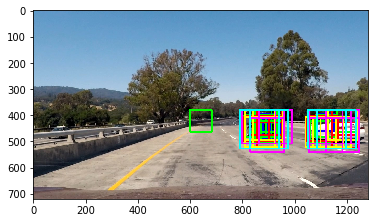

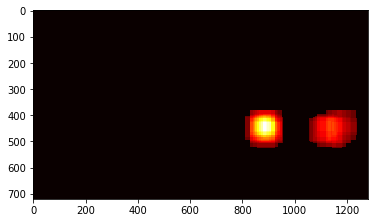

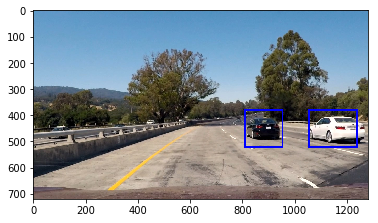

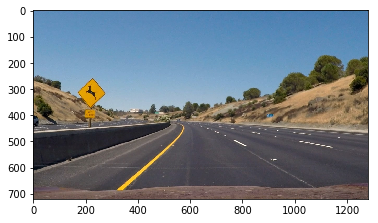

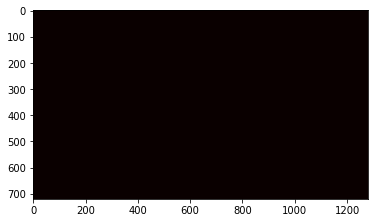

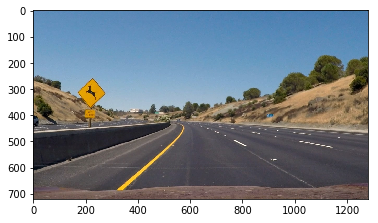

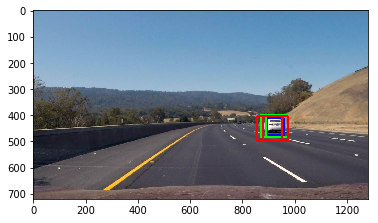

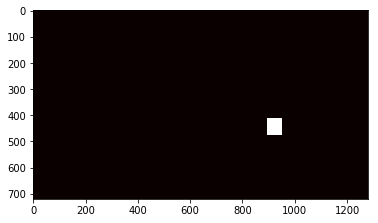

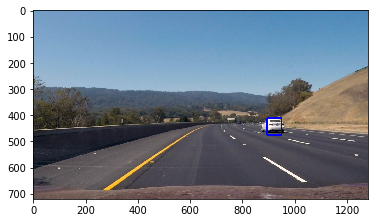

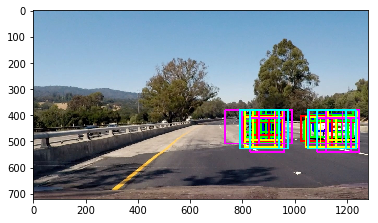

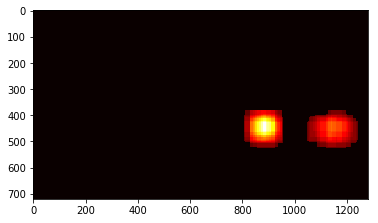

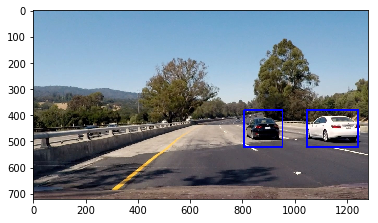

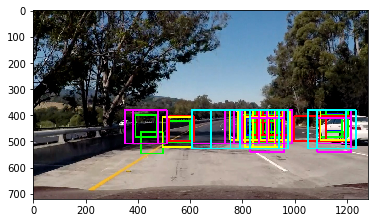

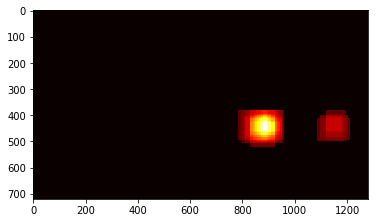

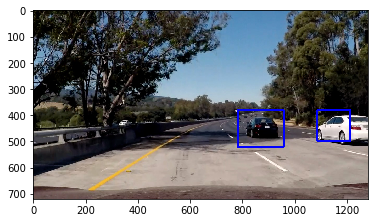

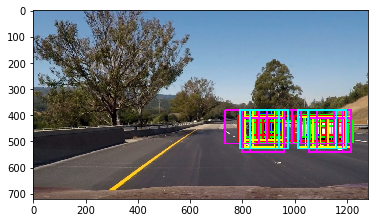

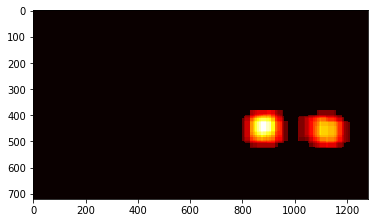

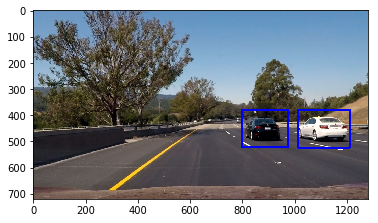

In [3]:
import glob

for image_p in glob.glob('test_images/test*.jpg'):
    img = mpimg.imread(image_p)  # test jpg  
    draw_img = np.copy(img)
    ystart_ystop_xstart_xstop_scale_color = [(380, 650 , 350, None, 1.0, (0,0,255) ),
                                             (380, 650 , 350, None, 1.3, (0,255,0) ),
                                             (380, 650 , 350, None, 1.5, (255,0,0) ),
                                             (380, 650 , 350, None, 1.8, (255,255,0) ),
                                             (380, 650 , 350, None, 2.0, (255,0,255) ),
                                             (380, 650 , 350, None, 2.3, (0,255,255) )
                                             ]

    cars_boxes_single =[]    
    cars_boxes =[]    
    for (ystart, ystop, xstart, xstop, scale, color) in ystart_ystop_xstart_xstop_scale_color:
        cars_boxes_single = find_cars_boxes(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins)      
        cars_boxes += cars_boxes_single
        draw_img = draw_boxes(draw_img,cars_boxes_single,color=color)          
    
    show_image(cv2.cvtColor(draw_img, cv2.COLOR_RGB2BGR))
       
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    heat = add_heat(heat,cars_boxes)
    heat = apply_threshold(heat,4)
    
    heatmap = np.clip(heat, 0, 255)
    fig = plt.figure()
    plt.imshow(heatmap, cmap='hot')
    
    labels = label(heatmap)
    cars_boxes = draw_labeled_bboxes(np.copy(img), labels)
    result = draw_boxes(img,cars_boxes)
    show_image(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
    

## 2. Vehicle detect

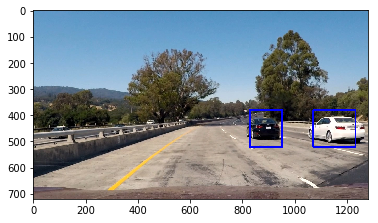

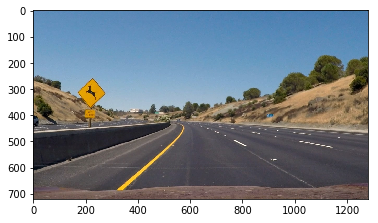

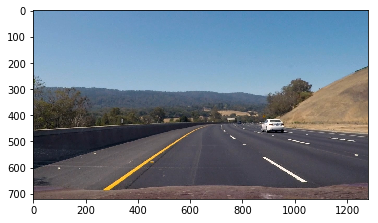

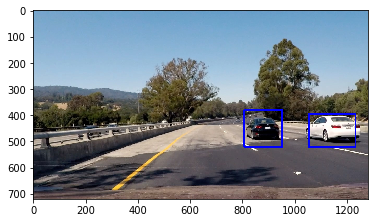

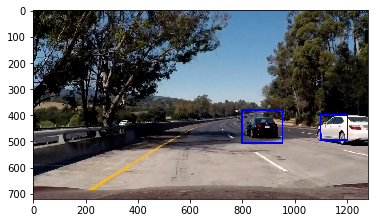

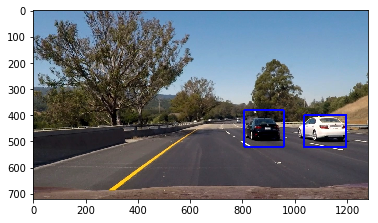

In [4]:
vd = vehicle_detector('model.p')
vd.ystart_ystop_xstart_xstop_scale_color = [(380, 650 , 350, None, 1.0, (0,0,255) ),
                                            (380, 650 , 350, None, 1.3, (0,255,0) ),
                                            (380, 650 , 350, None, 1.5, (255,0,0) ),
                                            (380, 650 , 350, None, 1.8, (255,255,0) ),
                                            (380, 650 , 350, None, 2.0, (255,0,255) ),
                                            (380, 650 , 350, None, 2.3, (0,255,255) )
                                            ]
vd.heatmap_acc = deque(maxlen=1)
vd.threshold = 6

for image in glob.glob('test_images/test*.jpg'):
    img = mpimg.imread(image)  # test jpg  
    result = vd.find_cars(img)
    show_image(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))

## 3. Generate processed video

In [5]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

vd = vehicle_detector('model.p')
vd.ystart_ystop_xstart_xstop_scale_color = [(380, 650 , 350, None, 1.0, (0,0,255) ),
                                            (380, 650 , 350, None, 1.3, (0,255,0) ),
                                            (380, 650 , 350, None, 1.5, (255,0,0) ),
                                            (380, 650 , 350, None, 1.8, (255,255,0) ),
                                            (380, 650 , 350, None, 2.0, (255,0,255) ),
                                            (380, 650 , 350, None, 2.3, (0,255,255) )
                                            ]
vd.heat_acc = deque(maxlen=3)
vd.threshold = 8

write_output = 'project_video_v2_out.mp4'
clip1 = VideoFileClip("project_video.mp4")


write_clip = clip1.fl_image(vd.find_cars) #NOTE: this function expects color images!!
%time write_clip.write_videofile(write_output, audio=False)

[MoviePy] >>>> Building video project_video_v2_out.mp4
[MoviePy] Writing video project_video_v2_out.mp4


100%|█████████▉| 1260/1261 [40:40<00:01,  1.84s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_v2_out.mp4 

CPU times: user 38min 24s, sys: 2min 8s, total: 40min 32s
Wall time: 40min 42s
